<a href="https://colab.research.google.com/github/feaviolp/e-portfolio/blob/main/notebooks/individual/panagiotis/Leigh_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
f.close()

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


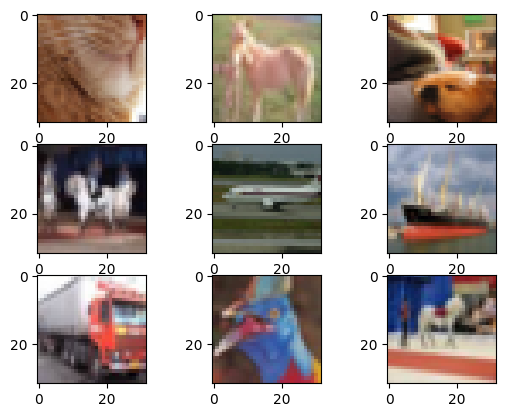

Epoch 1/500
1250/1250 [==============================] - 6s 5ms/step - loss: 4.6163 - acc: 0.1094 - val_loss: 2.4893 - val_acc: 0.0967
Epoch 2/500
1250/1250 [==============================] - 6s 4ms/step - loss: 2.4830 - acc: 0.1005 - val_loss: 2.4820 - val_acc: 0.0953
Epoch 3/500
1250/1250 [==============================] - 6s 4ms/step - loss: 2.4889 - acc: 0.1187 - val_loss: 2.4651 - val_acc: 0.1347
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.4463 - acc: 0.1650 - val_loss: 2.3952 - val_acc: 0.1742
Epoch 5/500
1250/1250 [==============================] - 6s 5ms/step - loss: 2.4182 - acc: 0.1696 - val_loss: 2.3904 - val_acc: 0.1798
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.4042 - acc: 0.1733 - val_loss: 2.3714 - val_acc: 0.1768
Epoch 7/500
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3980 - acc: 0.1740 - val_loss: 2.4463 - val_acc: 0.1632
Epoch 8/500
1250/1250 [==============================] 

KeyboardInterrupt: ignored

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.datasets import mnist, cifar10
from keras.utils.np_utils import to_categorical
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# load cifar10 in predefined train / test split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# split the training data into training and validation sets
# set `random_state` to 0 to ensure the same split every time the code is ran
# 20% ie 10000 entries will be split from the training set into validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (X_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

# the activation of each neuron represents the probability of the instance belonging to that particular class
# convert labels to one hot encoding to match output layer structure (10 classes)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

f = open("/content/drive/My Drive/output.txt", "w")
# Relu = Linear, Sigmoid = Signoid, Softmax = Probability dist, softplus(x) = log(exp(x) + 1), softsign(x) = x / (abs(x) + 1), Tanh = Tan function, Selu = Scaled Exponential Linear Unit, Elu = Exponential Linear Unit, Exponentinal = Exponential
activs = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'exponential']

# Random normal = Normal dist, Random Uniform = Uniform dist, Truncated Normal = Truncated Normal dist, Zeros = Tesnors = 0, Ones= Tesnors = 1, Glorot Normal = Xavier normal initializer, Glorot Uniform = Xavier uniform init,
weights_init = ['random_normal', 'random_uniform', 'truncated_normal', 'zeros', 'ones', 'glorot_normal',
                'glorot_uniform', 'he_normal', 'he_uniform', 'variance_scaling', 'constant']

#  loss = l1 * reduce_sum(abs(x)), loss = l2 * reduce_sum(square(x))
weights_reg = ['l1', 'l2', 'l1_l2']




 # ----------------------------------- 2 ----------------------------
# optims
#optims = ['sgd', 'adam', 'RMSprop', 'AdamW', 'Adadelta', 'Adagrad', 'Adamax', 'Adafactor', 'Nadam', 'Ftrl']
counter = 1
optims = ['adam']
kernel_init = [True, False]
bias_init = [True, False]
kernel_reg = [True, False]
act_reg = [True, False]
for optim in optims:
 for unit in range(700, 1350, 100):
  for activ in activs:
   for kernels in kernel_init:
    for bias in bias_init:
     for kernel in kernel_reg:
      for act in act_reg:
       if kernels:
        for weight in weights_init:
         if bias:
          for weight2 in weights_init:
           if kernel:
            for weightreg in weights_reg:
             if act:
              for weightreg2 in weights_reg:
               model = Sequential()  # Create a model in a sequencial way - instead of first diffining parameters and then instantiating a model
               model.add(Flatten(input_shape=(32, 32, 3)))  # Flatting instead of reshaping due to no target required
               model.add(layers.Dense(  # Only Dense layer is used to connect every input with every neuron
                units=unit,
                kernel_initializer=weight,
                bias_initializer=weight2,
                kernel_regularizer=weightreg,
                activity_regularizer=weightreg2,
                activation=activ))
               model.add(Dense(10, activation='softmax'))
               model.compile(loss='categorical_crossentropy',
                             optimizer=optim,
                             metrics=['acc'])  # can set to accuracy, precision, or recall

               model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stopping])
               test_loss, test_acc = model.evaluate(X_test, y_test)
               f.write(
                'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
                 counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
               print(
                'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
                 counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
               counter += 1
             else:
              model = Sequential()  # Create a model in a sequencial way - instead of first diffining parameters and then instantiating a model
              model.add(Flatten(input_shape=(32, 32, 3)))  # Flatting instead of reshaping due to no target required
              model.add(layers.Dense(  # Only Dense layer is used to connect every input with every neuron
               units=unit,
               kernel_initializer=weight,
               bias_initializer=weight2,
               kernel_regularizer=weightreg,
               activation=activ))
              model.add(Dense(10, activation='softmax'))
              model.compile(loss='categorical_crossentropy',
                            optimizer=optim,
                            metrics=['acc'])  # can set to accuracy, precision, or recall

              model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stopping])
              test_loss, test_acc = model.evaluate(X_test, y_test)
              f.write(
               'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
                counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
              print(
               'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
                counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
              counter += 1
           else:
            model = Sequential()  # Create a model in a sequencial way - instead of first diffining parameters and then instantiating a model
            model.add(Flatten(input_shape=(32, 32, 3)))  # Flatting instead of reshaping due to no target required
            model.add(layers.Dense(  # Only Dense layer is used to connect every input with every neuron
             units=unit,
             kernel_initializer=weight,
             bias_initializer=weight2,
             activation=activ))
            model.add(Dense(10, activation='softmax'))
            model.compile(loss='categorical_crossentropy',
                          optimizer=optim,
                          metrics=['acc'])  # can set to accuracy, precision, or recall

            model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stopping])
            test_loss, test_acc = model.evaluate(X_test, y_test)
            f.write(
             'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
              counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
            print(
             'Conter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
              counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
            counter += 1
         else:
          model = Sequential()  # Create a model in a sequencial way - instead of first diffining parameters and then instantiating a model
          model.add(Flatten(input_shape=(32, 32, 3)))  # Flatting instead of reshaping due to no target required
          model.add(layers.Dense(  # Only Dense layer is used to connect every input with every neuron
           units=unit,
           kernel_initializer=weight,
           activation=activ))
          model.add(Dense(10, activation='softmax'))
          model.compile(loss='categorical_crossentropy',
                        optimizer=optim,
                        metrics=['acc'])  # can set to accuracy, precision, or recall

          model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stopping])
          test_loss, test_acc = model.evaluate(X_test, y_test)
          f.write(
           'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
            counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
          print(
           'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
            counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
          counter += 1
       else:
        model = Sequential()  # Create a model in a sequencial way - instead of first diffining parameters and then instantiating a model
        model.add(Flatten(input_shape=(32, 32, 3)))  # Flatting instead of reshaping due to no target required
        model.add(layers.Dense(  # Only Dense layer is used to connect every input with every neuron
         units=unit,
         activation=activ))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer=optim,
                      metrics=['acc'])  # can set to accuracy, precision, or recall

        model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stopping])
        test_loss, test_acc = model.evaluate(X_test, y_test)
        f.write(
         'Counter: {}, Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
          counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
        print(
         'Counter: {}. Optimizer: {}, Units: {}, Activation: {}, Kernel init: {}, Bias init: {}, Kernel reg: {}, Activity reg: {}, Test accuracy: {}, Test loss: {}\n'.format(
          counter, optim, unit, activ, weight, weight2, weightreg, weightreg2, test_acc, test_loss))
        counter += 1
 f.close()



